In [1]:
%pylab
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, fftshift

tl, tr = -900, 900
time = np.linspace(tl, tr, 1801) #nc=15 
dt = time[1] - time[0]
nt = len(time)
D_S = loadtxt('dipole_d_S1_term12.dat')
D_P = loadtxt('dipole_d_P1_term12.dat')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
D_S.shape

(1801, 50)

In [18]:
N = 50
pp_tds_S, pp_tds_P = zeros(N), zeros(N)
TDS_sum = zeros(N, dtype=complex)
pp_TDS_sum, angle_max_TDS_sum = zeros(N), zeros(N)
TDS_theta, TDS_abs = zeros((N,nt*21)), zeros((N,nt*21))
THG_S, THG_P = [[] for i in range(N)], [[] for i in range(N)]

for i in range(N):       #固定tau,30组
    mul = 10*time.size
    D_S_ext = np.pad(D_S[:,i], (mul, mul),'constant')
    D_P_ext = np.pad(D_P[:,i], (mul, mul),'constant')     #补零
    fre_S, fre_P = fft(D_S_ext), fft(D_P_ext)                 #傅里叶变换到频域
#         THG_S[i].append(abs(fre_S[990])**2)
#         THG_P[i].append(abs(fre_P[990])**2)
    fre_S_thz = zeros(D_S_ext.size, complex)
    fre_P_thz = zeros(D_P_ext.size, complex)   
    con_2 = int((0.0177)/(2*pi*(1/(len(D_S_ext)*dt))))   #0.0106394 对应70THz
    con_1 = con_2 + 1  
    fre_S_thz[0:con_1], fre_P_thz[0:con_1] = fre_S[0:con_1], fre_P[0:con_1]
    fre_S_thz[(D_S_ext.size-con_2):D_S_ext.size]=fre_S[(D_S_ext.size-con_2):D_S_ext.size]
    fre_P_thz[(D_P_ext.size-con_2):D_P_ext.size]=fre_P[(D_P_ext.size-con_2):D_P_ext.size]     #取其THz低频部分

    tds_S, tds_P = ifft(fre_S_thz).real, ifft(fre_P_thz).real                                 #逆傅里叶变换到时域，得到TDS
    tds=zeros(D_S_ext.size,dtype=complex)
    tds.real=tds_P
    tds.imag=tds_S
    tds_theta=angle(tds)
    tds_abs=abs(tds)
    TDS_theta[i,:]=tds_theta
    TDS_abs[i,:]=tds_abs

    pp_tds_S[i], pp_tds_P[i] = real(fre_S[0]), real(fre_P[0])
    TDS_sum[i] = pp_tds_S[i] + pp_tds_P[i]*1j

    if (angle(TDS_sum[i]) < 0 or angle(TDS_sum[i]) == (1*pi)):
        pp_TDS_sum[i] = -abs(TDS_sum[i])
    else:
        pp_TDS_sum[i] = abs(TDS_sum[i])  

    angle_max_TDS_sum[i] = angle(TDS_sum[i])        
td = linspace(-(2*mul/time.size+1)*tl, (2*mul/time.size+1)*tr, D_S_ext.size)

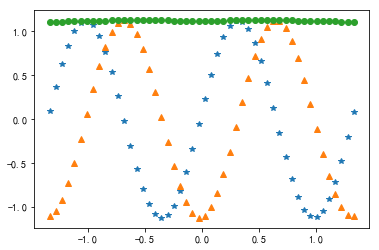

In [32]:
DT = linspace(-1.333, 1.333, 50)
plot(DT, pp_tds_S,"*")
plot(DT, pp_tds_P,"^")
plot(DT, sqrt(pp_tds_P**2 + pp_tds_S**2),"o")  

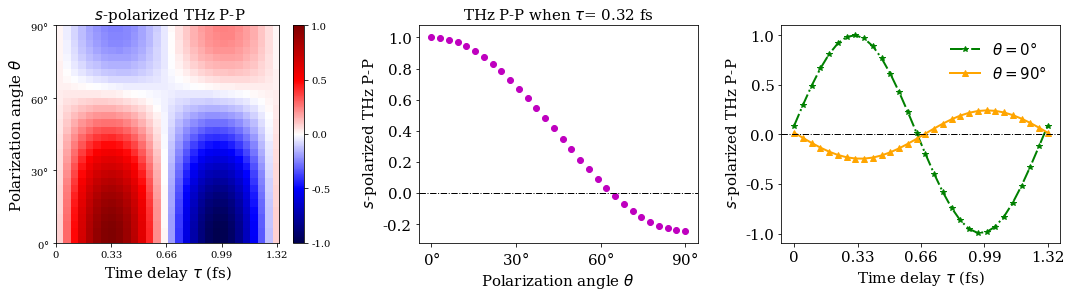

In [3]:
Size=15
nofont = {'fontname':'serif'}
chfont = {'fontname':'serif'}
figsize(18,4)
subplot(131)
extent=[0,1.334,0,90]
imshow(pp_tds_S/amax(abs(pp_tds_S)),extent=extent,cmap='seismic', aspect='auto',origin='lower')
savetxt('pp_tds_S_term12.txt',pp_tds_S)
title(' $s$-polarized THz P-P',size=Size,**chfont)
clim(-1,1)
cb=colorbar()
cb.set_ticks(linspace(-1,1,5))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family('serif')

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.333,0.33),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
    
xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)

subplot(132)
phase=7
Ang=linspace(0,90,N)
Phase=linspace(0,1.333,N)
scatter(Ang,pp_tds_S[:,phase]/amax(abs(pp_tds_S)),color='m')
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,90,4)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
xlabel(r'Polarization angle $\theta$',size=Size,**nofont)
ylabel(r' $s$-polarized THz P-P',size=Size,**nofont)
title(r'THz P-P when $\tau$= %0.2f fs' %(Phase[1]*phase),size=Size,**nofont)

subplot(133)
angle=29
plot(Phase,pp_tds_S[0,:]/amax(pp_tds_S),color="green",linewidth=2,linestyle='-.',marker='*',label=r'$\theta=%d \degree$' %(0))
plot(Phase,pp_tds_S[angle,:]/amax(pp_tds_S),color="orange",linewidth=2,linestyle='-',marker='^',label=r'$\theta=%d \degree$' %(Ang[1]*angle))
legend(loc=1, prop={'size': 15},frameon=False)
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,1.333,5)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont) 
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
ax.yaxis.get_major_formatter().set_powerlimits((0,2))
xlabel(r'Time delay $\tau$ (fs)',size=Size,**nofont)
ylabel(r' $s$-polarized THz P-P',size=Size,**nofont)
#title(r'THz P-P when $\theta$=%d$\degree$' %(Ang[1]*angle),size=Size,**nofont)
subplots_adjust(wspace=0.3)
#savefig('fig/S_THz_PP_12.png',dpi=512, bbox_inches='tight')
# np.savetxt('/home/chris/Desktop/calculation/SFA1/Jupyter notebook/Experiment/data/SFA_CC_0.32.txt', pp_tds_S[:,phase]/amax(abs(pp_tds_S)))
# np.savetxt('/home/chris/Desktop/calculation/SFA1/Jupyter notebook/Experiment/data/SFA_CC_90.txt', pp_tds_S[angle,:]/amax(pp_tds_S))

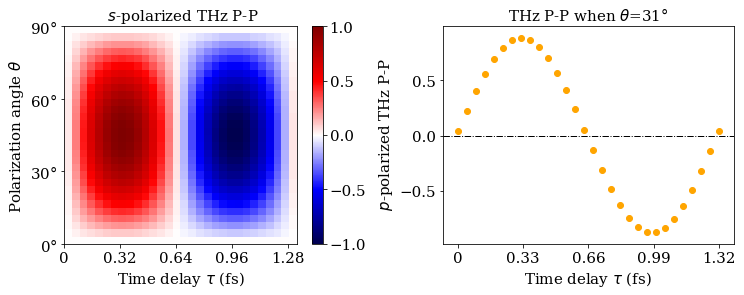

In [7]:
figsize(12,4)
subplot(121)
extent=[0,1.334,0,90]
imshow(pp_tds_P/amax(abs(pp_tds_P)),extent=extent,cmap="seismic", aspect='auto',origin='lower')

title(' $s$-polarized THz P-P',size=Size,**chfont)
clim(-1,1)
cb=colorbar()
cb.set_ticks(linspace(-1,1,5))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family('serif')

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
    
xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)
subplot(122)
angle=10
scatter(Phase,pp_tds_P[angle, :]/amax(pp_tds_P),color="orange")
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,1.333,5)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont) 
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
ax.yaxis.get_major_formatter().set_powerlimits((0,2))
xlabel(r'Time delay $\tau$ (fs)',size=Size,**nofont)
ylabel(r' $p$-polarized THz P-P',size=Size,**nofont)
title(r'THz P-P when $\theta$=%d$\degree$' %(Ang[1]*angle),size=Size,**nofont)
subplots_adjust(wspace=0.3)
#savefig('fig/THz_PP.png',dpi=512, bbox_inches='tight')

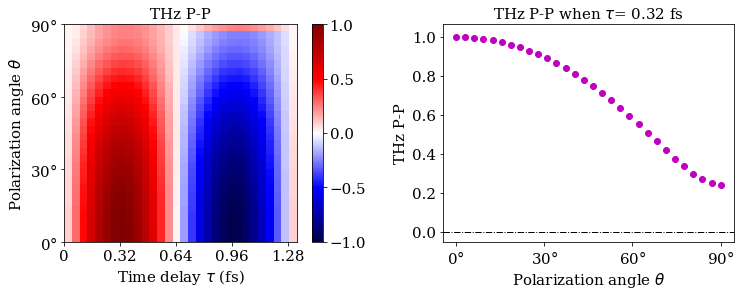

In [5]:
figsize(12,4)
subplot(121)
extent=[0,1.334,0,90]
imshow(pp_TDS_sum/amax(abs(pp_TDS_sum)),extent=extent,cmap="seismic", aspect='auto',origin='lower')

title('THz P-P',size=Size,**chfont)
clim(-1,1)
cb=colorbar()
cb.set_ticks(linspace(-1,1,5))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family('serif')

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
    
xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)

subplot(122)
phase=7
Ang=linspace(0,90,N)
Phase=linspace(0,1.333,N)
scatter(Ang,pp_TDS_sum[:,phase]/amax(abs(pp_TDS_sum)),color='m')
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,90,4)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
xlabel(r'Polarization angle $\theta$',size=Size,**nofont)
ylabel(r'THz P-P',size=Size,**nofont)
title(r'THz P-P when $\tau$= %0.2f fs' %(Phase[1]*phase),size=Size,**nofont)
subplots_adjust(wspace=0.3)

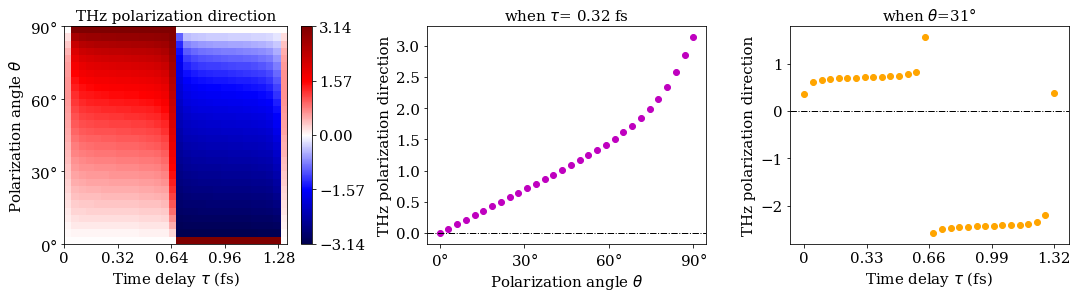

In [6]:
figsize(18,4)
subplot(131)
extent=[0,1.334,0,90]
imshow(angle_max_TDS_sum,extent=extent,cmap="seismic", aspect='auto',origin='lower')
title('THz polarization direction',size=Size,**chfont)
cb=colorbar()
clim(-3.14,3.14)
cb.set_ticks(linspace(-3.14,3.14,5))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("serif")

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
    
xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)
subplot(132)
phase=7
Ang=linspace(0,90,N)
Phase=linspace(0,1.333,N)
scatter(Ang,angle_max_TDS_sum[:,phase],color='m')
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,90,4)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
xlabel(r'Polarization angle $\theta$',size=Size,**nofont)
ylabel(r'THz polarization direction',size=Size,**nofont)
title(r'when $\tau$= %0.2f fs' %(Phase[1]*phase),size=Size,**nofont)
subplot(133)
angle=10
scatter(Phase,angle_max_TDS_sum[angle,:],color="orange")
axhline(y=0,color='black',linestyle='-.',linewidth=1)
ax=plt.gca()
Xscale=linspace(0,1.333,5)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont) 
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
ax.yaxis.get_major_formatter().set_powerlimits((0,2))
xlabel(r'Time delay $\tau$ (fs)',size=Size,**nofont)
ylabel(r'THz polarization direction',size=Size,**nofont)
title(r'when $\theta$=%d$\degree$' %(Ang[1]*angle),size=Size,**nofont)
subplots_adjust(wspace=0.3)

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


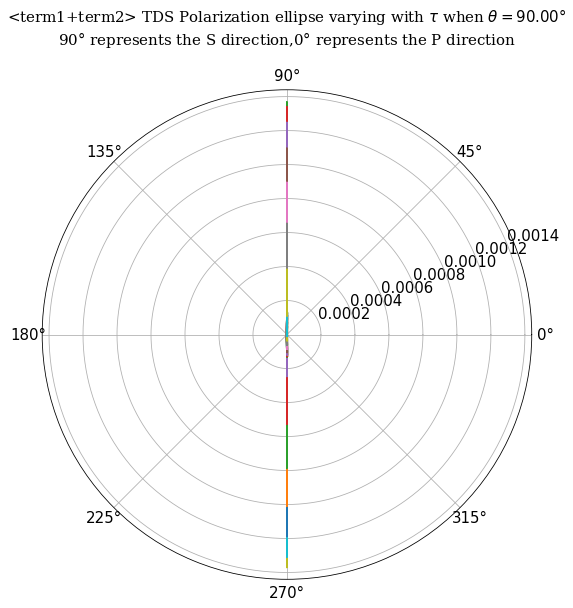

In [7]:
figsize(8.5,8.5)
for i in range(30):   #固定偏振度，改变时间延迟
    subplot(111,polar=True)
    ind=29
    plot(TDS_theta[i,ind,:],TDS_abs[i,ind,:],linewidth=1.5)
title("<term1+term2> TDS Polarization ellipse varying with $\\tau$ when $\\theta={:.2f}\degree$\n90$\degree$ represents the S direction,0$\degree$ represents the P direction".format(Ang[1]*ind) ,y=1.08,size=Size,**chfont)
plt.tight_layout(pad=1.0)
#savefig(r'fig/TDS_{:.2f}du_term12.png'.format(Ang[1]*ind),dpi=512, bbox_inches='tight')

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


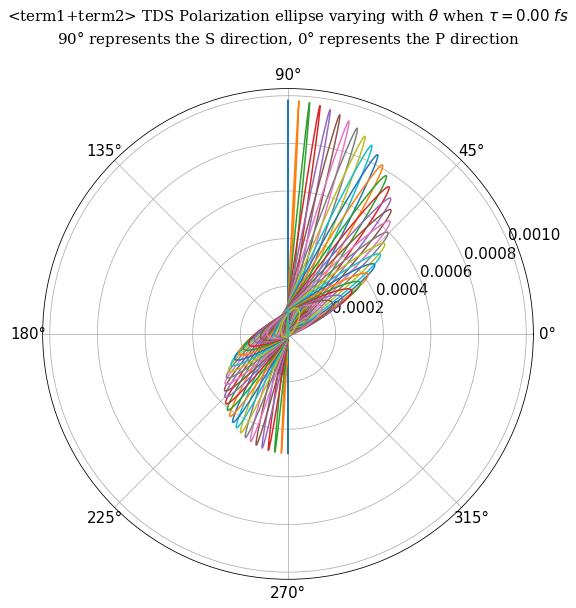

In [8]:
figsize(8.5,8.5)
for i in range(30):   #固定时间延迟，改变FW偏振度
    subplot(111,polar=True)
    ind=0
    plot(TDS_theta[ind,i,:],TDS_abs[ind,i,:],linewidth=1.5)
title("<term1+term2> TDS Polarization ellipse varying with $\\theta$ when $\\tau={:.2f}\ fs$\n90$\degree$ represents the S direction, 0$\degree$ represents the P direction" .format(ind*Phase[1]),y=1.08,size=Size,**chfont)
plt.tight_layout(pad=1.0)
#savefig('fig/TDS_{:.2f}fs_term12.png'.format(ind*Phase[1]),dpi=512, bbox_inches='tight')

Text(0,0.5,'Polarization angle $\\theta$')

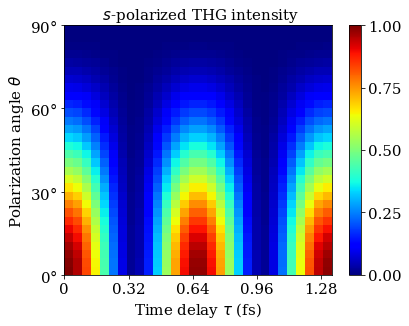

In [9]:
Size = 15
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(transpose(THG_S)/amax(THG_S),extent=extent,cmap="jet", aspect='auto',origin='lower')
nofont = {'fontname':'serif'}

title(' $s$-polarized THG intensity',size=Size,**nofont)
clim(0,1)
cb=colorbar()
cb.set_ticks(around(linspace(0,amax(THG_S)/amax(THG_S),5),decimals=3))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("serif")


matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**nofont)
ylabel(r'Polarization angle $\theta$',size=Size,**nofont)

Text(0,0.5,'Polarization angle $\\theta$')

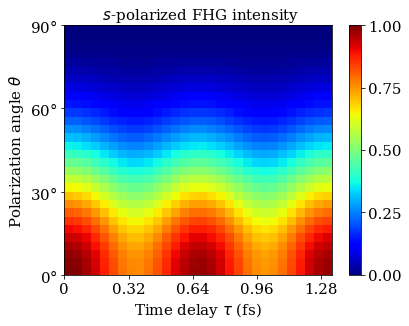

In [4]:
Size = 15
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(transpose(FHG_S)/amax(FHG_S),extent=extent,cmap="jet", aspect='auto',origin='lower')
nofont = {'fontname':'serif'}

title(' $s$-polarized FHG intensity',size=Size,**nofont)
clim(0,1)
cb=colorbar()
cb.set_ticks(around(linspace(0,amax(THG_S)/amax(THG_S),5),decimals=3))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("serif")


matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**nofont)
ylabel(r'Polarization angle $\theta$',size=Size,**nofont)

Text(0,0.5,'Polarization angle $\\theta$')

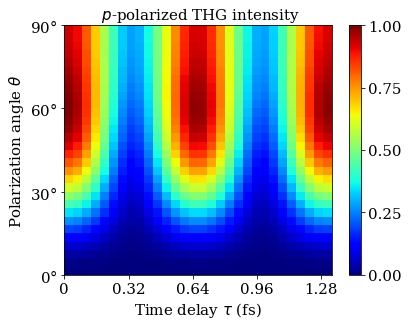

In [10]:
Size = 15
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(transpose(THG_P)/amax(THG_P),extent=extent,cmap="jet", aspect='auto',origin='lower')
nofont = {'fontname':'serif'}

title(' $p$-polarized THG intensity',size=Size,**nofont)
#clim(0,1)
cb=colorbar()
cb.set_ticks(around(linspace(0,amax(THG_P)/amax(THG_P),5),decimals=3))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("serif")


matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**nofont)
ylabel(r'Polarization angle $\theta$',size=Size,**nofont)

In [8]:
jihua = zeros((2,4))
jihua.shape

(2, 4)

In [41]:
tau0 = np.linspace(-10., 10., 21)[0:21]
tau0

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])